   ASSIGNMENT:03

 Given a bank customer, build a neural network-based classifier that can determine whether 
they will leave or not in the next 6 months. 
Dataset Description: The case study is from an open-source dataset from Kaggle. 
The dataset contains 10,000 sample points with 14 distinct features such as 
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. 
Link to the Kaggle project: 
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling  
Perform following steps: 
1. Read the dataset. 
2. Distinguish the feature and target set and divide the data set into training and test sets. 
3. Normalize the train and test data.  
4. Initialize and build the model. Identify the points of improvement and implement the same.  
5. Print the accuracy score and confusion matrix (5 points).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras.layers import *

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df=df.drop(['Surname', 'CustomerId','RowNumber'],axis=1)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [11]:
df = pd.concat([df,gender,states], axis = 1)

In [12]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y = df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
classifier = Sequential()

In [18]:
classifier.add(Dense(activation = "relu", input_dim = 11, units = 6, kernel_initializer = "uniform")) 

In [19]:
classifier.add(Dense(activation = "relu", units = 6, kernel_initializer = "uniform"))

In [20]:
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

In [21]:
classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50) #Fitting the ANN to training dataset

Epoch 1/50
700/700 [==============================] - 3s 3ms/step - loss: 0.4988 - accuracy: 0.7989
Epoch 2/50
700/700 [==============================] - 2s 2ms/step - loss: 0.4195 - accuracy: 0.8091
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8291
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8310
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3875 - accuracy: 0.8317
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3815 - accuracy: 0.8300
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8359
Epoch 8/50
700/700 [==============================] - 2s 3ms/step - loss: 0.3747 - accuracy: 0.8440
Epoch 9/50
700/700 [==============================] - 2s 3ms/step - loss: 0.3727 - accuracy: 0.8443
Epoch 10/50
700/700 [==============================] - 2s 2ms/step - loss: 0.3701 - accuracy: 0.8484

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 1ms/step


In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2259,  109],
       [ 307,  325]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

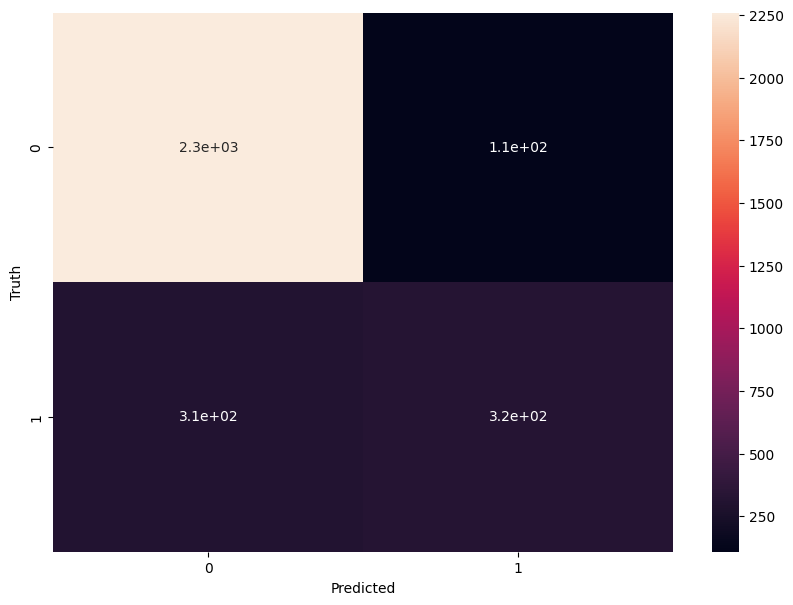

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2368
           1       0.75      0.51      0.61       632

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



Class weights: {0: 0.6279153211338356, 1: 2.4544179523141656}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                          

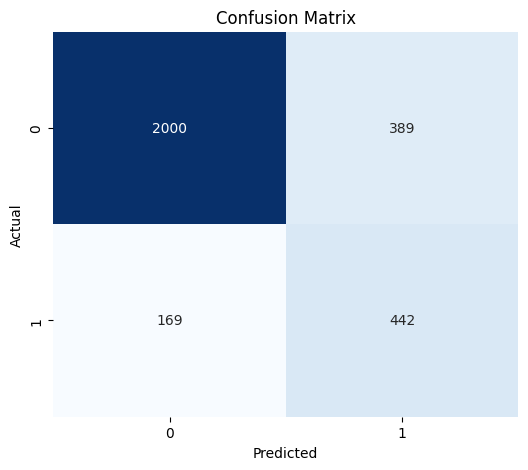

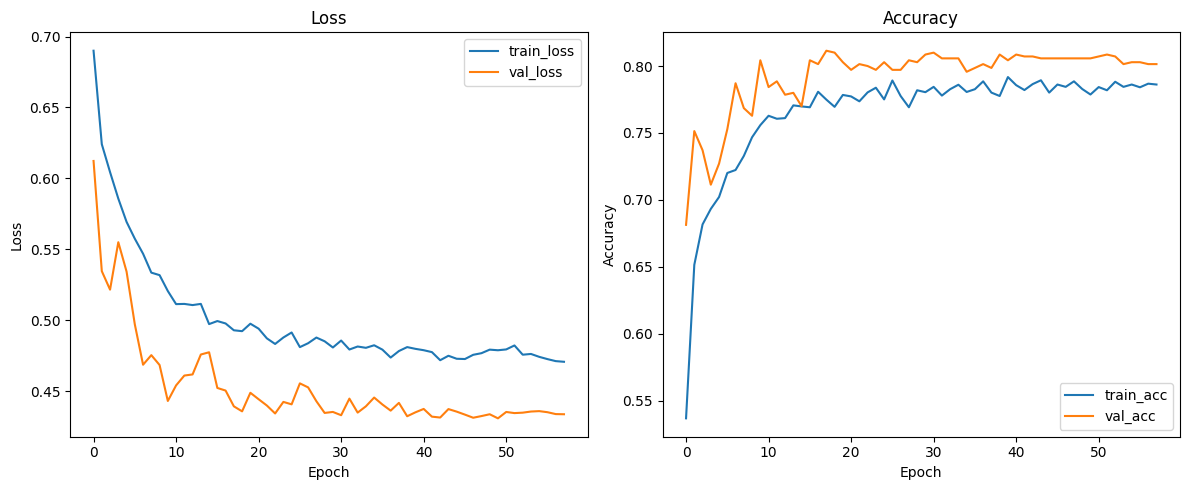

In [29]:
# bank_churn_ann.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import os

# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# 1. Read dataset
df = pd.read_csv("Churn_Modelling.csv")  # update path if needed

# 2. Basic cleanup: drop ID-like columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, errors='ignore')

# 3. One-hot encode categorical variables (Geography, Gender)
# Use drop_first to avoid multicollinearity
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# 4. Define feature matrix X and target y
# Keep features used in your original code + encoded columns
# Inspect columns if needed: print(df.columns)
X = df.drop(columns=['Exited'])
y = df['Exited']

# 5. Train-test split (stratify to keep class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED, stratify=y
)

# 6. Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Compute class weights to address class imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = {int(c): w for c, w in zip(classes, class_weights)}
print("Class weights:", class_weight_dict)

# 8. Build the neural network (improved architecture with Dropout)
input_dim = X_train.shape[1]
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

# 9. Callbacks: early stopping & LR reduction
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)

# 10. Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.10,   # 10% of train used for validation
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
    verbose=2
)

# 11. Evaluate on test set
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f"\nTest Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 12. Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 13. Plot training history (loss and accuracy)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()
